Done. FE model exported to ../input_files/ws_11_12_FE_Model.png .


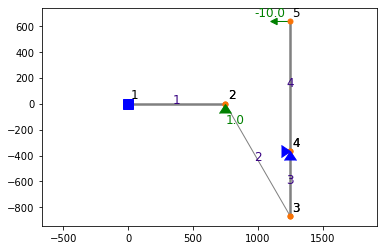

In [41]:
from parse_input import *

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


if __name__ == '__main__':
    
    # filename = 'ss_10.txt'
    # filename = 'ws_09_10.txt'
    filename = 'ws_11_12.txt'
    
    # P A R S E  I N P U T  F I L E
    nodes, elements, propRod, propBeam, load, spc = parseInputFile('../input_files/'+filename)
    
    el_length = []
    for eid in sorted(elements.keys()):
        # print(eid, elements[eid].elem_type, elements[eid].n1, elements[eid].n2)
        
        e_length = elements[eid].length(nodes)
        el_length.append(e_length)
        
        n1x = nodes[elements[eid].n1].x
        n1y = nodes[elements[eid].n1].y
        
        n2x = nodes[elements[eid].n2].x
        n2y = nodes[elements[eid].n2].y
        
        # print(n1x, n1y, n2x, n2y)
   
        dx = (n1x + n2x)/2 # Mid position x of element
        dy = (n1y + n2y)/2 # Mid position y of element
        
        if elements[eid].elem_type == 'beam':
            elemWidth = 2.5
        else:
            elemWidth = 1

        plt.plot( [n1x,n2x],[n1y,n2y], linestyle='-', color='#808080', linewidth=elemWidth)
        plt.plot( [n1x,n2x],[n1y,n2y], marker='o', color='#F97306', markersize=5, linestyle='None')
        
        plt.annotate(str(int(elements[eid].n1)), (n1x,n1y), textcoords='offset points', xytext=(10,5), ha='right', fontsize = 12, color='black')
        plt.annotate(str(int(elements[eid].n2)), (n2x,n2y), textcoords='offset points', xytext=(10,5), ha='right', fontsize = 12, color='black')
        
        plt.annotate(str(int(eid)),(dx,dy), ha='center',fontsize = 12, color='#380282')
        
        plt.axis('equal')
        #plt.axis('off')
    
    # Plot applied forces
    
    kwPos = dict(arrowstyle="-|>, head_length=6, head_width=3", color="g")
    kwNeg = dict(arrowstyle="<|-, head_length=6, head_width=3", color="g")

    for nid in sorted(load.keys()):
        for i in range(len(load[nid])):
            
            scale = max(el_length)*0.1
            
            # print(nid, load[nid][i].local_dof, load[nid][i].value, scale )
            
            # Plot Moments
            if load[nid][i].local_dof == 3 and load[nid][i].value > 0:
                a3 = patches.FancyArrowPatch((nodes[int(nid)].x, nodes[int(nid)].y+scale), (nodes[int(nid)].x, nodes[int(nid)].y-scale), connectionstyle="arc3,rad=.4", **kwPos)
                plt.gca().add_patch(a3)
                plt.annotate(str(load[nid][i].value), (nodes[int(nid)].x,nodes[int(nid)].y), textcoords='offset points', xytext=(-15,5), ha='right', fontsize = 12, color='g')
            elif load[nid][i].local_dof == 3 and load[nid][i].value < 0:
                a3 = patches.FancyArrowPatch((nodes[int(nid)].x, nodes[int(nid)].y+scale), (nodes[int(nid)].x, nodes[int(nid)].y-scale), connectionstyle="arc3,rad=.4", **kwNeg)
                plt.gca().add_patch(a3)
                plt.annotate(str(load[nid][i].value), (nodes[int(nid)].x,nodes[int(nid)].y), textcoords='offset points', xytext=(-15,5), ha='right', fontsize = 12, color='g')
            # Plot Forces
            elif load[nid][i].local_dof == 1 and load[nid][i].value < 0:    
                plt.arrow( nodes[int(nid)].x, nodes[int(nid)].y, -scale, 0, fc="g", ec="g", head_width=50, head_length=50 )
                plt.annotate(str(load[nid][i].value), (nodes[int(nid)].x,nodes[int(nid)].y), textcoords='offset points', xytext=(-5,5), ha='right', fontsize = 12, color='g')
            elif load[nid][i].local_dof == 1 and load[nid][i].value > 0:    
                plt.arrow( nodes[int(nid)].x, nodes[int(nid)].y, scale, 0, fc="g", ec="g", head_width=50, head_length=50 )
                plt.annotate(str(load[nid][i].value), (nodes[int(nid)].x,nodes[int(nid)].y), textcoords='offset points', xytext=(40,5), ha='right', fontsize = 12, color='g')
    
    # Plot constraints    
    for nid in sorted(spc.keys()):
        for i in range(len(spc[nid])):
            
            # print(nid, spc[nid][i].fixed_local_dof, spc[nid][i].value)
            
            if len(spc[nid][i].fixed_local_dof) == 3:
                # print(nodes[int(nid)].x, nodes[int(nid)].y)
                plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker='s', markersize= 10, fillstyle='full', color='b')
            elif len(spc[nid][i].fixed_local_dof) == 2:
                # print(nodes[int(nid)].x, nodes[int(nid)].y)
                plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=6, markersize= 12, fillstyle='full', color='b')
                plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=5, markersize= 12, fillstyle='full', color='b')
            else:
                # print(nodes[int(nid)].x, nodes[int(nid)].y, spc[nid][i].fixed_local_dof, spc[nid][i].value)
                if spc[nid][i].fixed_local_dof[0] == 1 and spc[nid][i].value == 0:
                    plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=5, markersize= 12, fillstyle='full', color='b')
                elif spc[nid][i].fixed_local_dof[0] == 1 and spc[nid][i].value != 0:
                    plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=5, markersize= 12, fillstyle='full', color='g')
                elif spc[nid][i].fixed_local_dof[0] == 2 and spc[nid][i].value == 0:
                    plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=6, markersize= 12, fillstyle='full', color='b')
                elif spc[nid][i].fixed_local_dof[0] == 2 and spc[nid][i].value != 0:
                    plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker=6, markersize= 12, fillstyle='full', color='g')
                    plt.annotate(str(spc[nid][i].value), (nodes[int(nid)].x,nodes[int(nid)].y), textcoords='offset points', xytext=(0,-20), ha='left', fontsize = 12, color='g')
    
    fig_fem_model_input = filename.replace('.txt','')+'_FE_Model.png'
    output_path = '../input_files/'+fig_fem_model_input
    plt.savefig(output_path, dpi = 200)
    
    print(f'Done. FE model exported to {output_path} .')